Import needed libraries

In [ ]:
# Get the dataset
from keras.datasets import mnist
# This will help visualize the images from the dataset
from matplotlib import pyplot as plt
# Used to create the keras neural network model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Allows a confusion matrix to be created based on the model
from sklearn.metrics import confusion_matrix
import numpy as np
# Used to change confusion matrix to easier-to-read dataframe
import pandas as pd

1. Load the MNIST data set.

In [ ]:
# Load the mnist dataset into training and testing data sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

2. Display the first five images in the training data set

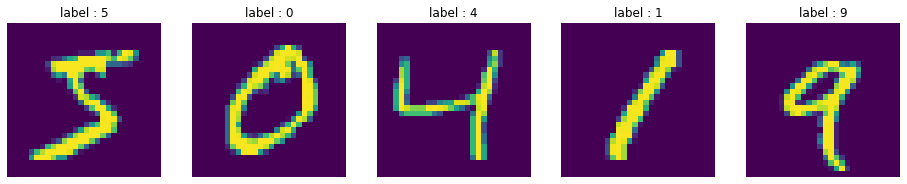

In [ ]:
# Define the figure and axes
fig, axes = plt.subplots(1, 5, figsize = (16, 5))
# Use a for loop to print the images and labels
for idx, axe in enumerate(axes.flatten()):
    axe.axis('off')
    axe.set_title(f'label : {y_train[idx]}')
    axe.imshow(x_train[idx])
# Show the plot
plt.show()

In [ ]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


3. Build and train a Keras CNN classifier on the MNIST training set.

In [ ]:
# Assign Sequential() to model
model = Sequential()
# This layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs
model.add(Conv2D(28, kernel_size = (3,3), input_shape = input_shape))
# Downsamples the input along its spatial dimensions (height and width) 
# by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input
model.add(MaxPooling2D(pool_size = (2, 2)))
# Flattening the 2D arrays for fully connected layers
model.add(Flatten())
# The layer that contains all the neurons that are deeply connected within themselves
# Every neuron in the dense layer takes the input from all the other neurons of the previous layer
model.add(Dense(128, activation = tf.nn.relu))
# Randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting
model.add(Dropout(0.2))
# Softmax is good for classification. It will take any number and map it to an output of either 0 or 1 (for example)
model.add(Dense(10, activation = tf.nn.softmax))

4. Report the test accuracy of your model.

In [ ]:
# The compilation is the final step in creating a model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# Applies the model to the training data and prints the accuracy as it's going through
model.fit(x = x_train, y = y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2092 - accuracy: 0.9372
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0849 - accuracy: 0.9742
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0590 - accuracy: 0.9812
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0437 - accuracy: 0.9863
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0352 - accuracy: 0.9889
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0301 - accuracy: 0.9904
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0243 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0222 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0204 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - l

5. Display a confusion matrix on the test set classifications.

In [ ]:
# Run predictions on x_test
test_predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
# Create a confusion matrix on the test predictions and y_test data
cm = confusion_matrix(y_test, np.argmax(test_predictions, axis = 1))

In [ ]:
# Display the confusion matrix
cm

array([[ 970,    0,    1,    0,    0,    3,    2,    1,    2,    1],
       [   0, 1128,    0,    1,    0,    1,    2,    1,    2,    0],
       [   2,    4, 1010,    2,    0,    0,    4,    5,    5,    0],
       [   0,    0,    0,  996,    0,    9,    0,    2,    2,    1],
       [   0,    0,    2,    0,  965,    0,    5,    0,    1,    9],
       [   1,    0,    1,    6,    0,  880,    3,    0,    1,    0],
       [   5,    1,    1,    0,    1,    3,  943,    0,    4,    0],
       [   1,    2,    7,    3,    1,    0,    0, 1006,    2,    6],
       [   1,    1,    3,    8,    1,    7,    0,    3,  948,    2],
       [   1,    1,    0,    3,    2,    1,    0,    6,    4,  991]],
      dtype=int64)

In [ ]:
# Assign the confusion matrix array to a variable X
X = [[ 975,    0,    1,    0,    0,    0,    3,    1,    0,    0],
       [   0, 1128,    3,    0,    0,    0,    1,    2,    1,    0],
       [   1,    0, 1018,    0,    1,    0,    2,    9,    1,    0],
       [   0,    0,    2,  984,    0,    6,    0,   10,    1,    7],
       [   0,    0,    2,    0,  967,    0,    2,    2,    1,    8],
       [   0,    0,    1,    6,    0,  882,    2,    0,    1,    0],
       [   3,    2,    1,    1,    4,    2,  945,    0,    0,    0],
       [   1,    2,    7,    0,    0,    0,    0, 1015,    2,    1],
       [   3,    0,    4,    5,    1,    1,    2,    4,  948,    6],
       [   2,    0,    1,    2,    5,    6,    0,    4,    3,  986]]


In [ ]:
# Change the confusion matrix values to a pandas dataframe to make it easier to read
cm = pd.DataFrame(X, columns = list("ABCDEFGHIJ"), index = list("ABCDEFGHIJ"))
cm

,A,B,C,D,E,F,G,H,I,J
A,975,0,1,0,0,0,3,1,0,0
B,0,1128,3,0,0,0,1,2,1,0
C,1,0,1018,0,1,0,2,9,1,0
D,0,0,2,984,0,6,0,10,1,7
E,0,0,2,0,967,0,2,2,1,8
F,0,0,1,6,0,882,2,0,1,0
G,3,2,1,1,4,2,945,0,0,0
H,1,2,7,0,0,0,0,1015,2,1
I,3,0,4,5,1,1,2,4,948,6
J,2,0,1,2,5,6,0,4,3,986


6. Summarize your results.

Notice that as the model is applied over and over, the accruacy increases. This is because the model is "learning" in real time. We can also see that the majority of the time, the model predicted correctly (for instance, A was predicted as A 975 times). The strong diagonal line indicates a successful model. 